# Numpy & Pandas

## Numpy and Arrays

Numpy is a powerful numeric library that is essential for anyone analyzing data with Python. Numpy is a huge package that can support a multitude of tasks. Numpy is also inextricably linked to SciPy, a powerful library for scientific computing with capabilities for fitting, linear algebra, machine learning, etc. Here we are just going to cover some of the basics of numpy, but I encourage you to check out the numpy documentation pages (https://numpy.org/doc/stable/) to get an idea of the variety of things you can do.

Arrays are a data type which is fundamental to Numpy. In some ways Numpy arrays are like Python lists:
    - both are used for storing data/objects
    - both are mutable
    - items can be extracted from both using indexing and slicing
    - both can be iterated over

However there are key aspects of arrays that make them very different:
    - most operators act on the elements of an array instead of the array as a whole
    - arrays can only hold data of a single type
    - arrays can efficiently store large amounts of data in memory


In [1]:
import numpy as np

# create some sample lists
xlist = [1, 2, 3, 4]
ylist = [1, 4, 9, 16]

# create some sample arrays
x = np.array([1, 2, 3, 4])
y = np.array([1, 4, 9, 16])

First let's checkout the different behaviors between lists and arrays

In [3]:
print(xlist * 4)

print(x * 4)

print(x / 4)

print(xlist / 4)

[1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4]
[ 4  8 12 16]
[0.25 0.5  0.75 1.  ]


TypeError: unsupported operand type(s) for /: 'list' and 'int'

Notice how the list was repeated 4 times, whereas each element of the array was multiplied by 4 and the result ended up being the same length.

Division works element-wise for arrays, but division is not defined and produces an error when performed on a list.

## Iterating, indexing, and slicing

Iterating over a 1D array looks just like iterating over a list

In [4]:
for val in xlist:
    print(val)

for val in x:
    print(val)

1
2
3
4
1
2
3
4


Iterating an N-dimensional array will iterate over slices along the first dimension.

In [5]:
y = np.zeros((5, 5))

for val in y:
    print(val)

print()
# you could accomplish the same thing like this (but you probably shouldn't)
for i in range(y.shape[0]):
    val = y[i, :]
    print(val)

[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]

[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]


We can also select subsets of the array using conditionals.

In [6]:
xs = x[x < 2]
xs

array([1])

## Pandas Tables

Pandas is a powerful data analysis package that provides tools for manipulating tabular data. This is particularly useful in many astronomical applications, such as spectroscopy, and time-series. Data is organized into rows and columns where the columns are named and recalled using arbitrary Python objects (strings are the most convenient). This is in contrast to Numpy arrays where columns can only be accessed using integer indices (however, see record arrays https://docs.scipy.org/doc/numpy-1.10.1/user/basics.rec.html).

Sorting, querying, merging, and aggregation are some of the most useful Pandas features, but this tutorial will only scratch the surface. See https://pandas.pydata.org/docs/ for the full documentation.


Pandas is most useful for dealing with heterogeneous and/or large datasets, when merging or complex queries are needed, or if you have metadata associated with columns (e.g. strings as labels).

The basic units/objects in Pandas are the Series and DataFrame objects.

In [7]:
import pandas as pd

# Lets create a sample Series object
x = [1.0, 2.0, 4.4, 4.5, 8.8, 9.1, 8.7, 2.3, 2.4, 3.1, 5.9]
s = pd.Series(x)

print(s)

0     1.0
1     2.0
2     4.4
3     4.5
4     8.8
5     9.1
6     8.7
7     2.3
8     2.4
9     3.1
10    5.9
dtype: float64


We populated a Series starting from a list of floating point numbers. Notice that two columns are printed in the output. Every entry in a Series has a corresponding integer index, generally these indices are created automatically. The data type of the series is printed below the Series itself. Series objects can only store data of a single type, but any data type can be stored.

A Series is like a single column of data in a table. A DataFrame is the Pandas object that represents a full table. Each column in the table is a Series.

There are several ways to construct a Pandas DataFrame, including from Numpy arrays, Python dictionaries, a list of Series objects, reading from a CSV, reading from a URL, etc.

Let's first construct a single-column DataFrame from our series `s`.

In [8]:
df = pd.DataFrame(s, columns=['sample'])
df

,sample
0,1.0
1,2.0
2,4.4
3,4.5
4,8.8
5,9.1
6,8.7
7,2.3
8,2.4
9,3.1


Jupyter has special support for displaying DataFrames, simply typing the variable name of a DataFrame at the end of the cell will present a nicely formatted view of the table.

Let's add some more columns to our DataFrame.

In [9]:
df['sample_base'] = df['sample'] // 1
df['sample_plus1'] = df['sample'] + 1
df['sample_squared'] = df['sample']**2
df

,sample,sample_base,sample_plus1,sample_squared
0,1.0,1.0,2.0,1.00
1,2.0,2.0,3.0,4.00
2,4.4,4.0,5.4,19.36
3,4.5,4.0,5.5,20.25
4,8.8,8.0,9.8,77.44
5,9.1,9.0,10.1,82.81
6,8.7,8.0,9.7,75.69
7,2.3,2.0,3.3,5.29
8,2.4,2.0,3.4,5.76
9,3.1,3.0,4.1,9.61


Notice that we can access the values in a column using two different syntax.

Now sort by the `sample_squared` column

In [10]:
df = df.sort_values(by='sample_squared')
df

,sample,sample_base,sample_plus1,sample_squared
0,1.0,1.0,2.0,1.00
1,2.0,2.0,3.0,4.00
7,2.3,2.0,3.3,5.29
8,2.4,2.0,3.4,5.76
9,3.1,3.0,4.1,9.61
2,4.4,4.0,5.4,19.36
3,4.5,4.0,5.5,20.25
10,5.9,5.0,6.9,34.81
6,8.7,8.0,9.7,75.69
4,8.8,8.0,9.8,77.44


Notice that the indices were re-ordered as well. The indices retain information about the original ordering.

We can also select subsets of the data using conditionals similar to Numpy arrays.

In [11]:
q1 = df[df['sample'] <= 4]
q1

,sample,sample_base,sample_plus1,sample_squared
0,1.0,1.0,2.0,1.00
1,2.0,2.0,3.0,4.00
7,2.3,2.0,3.3,5.29
8,2.4,2.0,3.4,5.76
9,3.1,3.0,4.1,9.61


The `.groupby` method is used to create Pandas `DataFrameGroupBy` object which can be used to calculate statistics within the groups.

In [12]:
# groups that share a common sample_base field
g = df.groupby('sample_base')

# count number of rows within each group
print(g.count())

             sample  sample_plus1  sample_squared
sample_base                                      
1.0               1             1               1
2.0               3             3               3
3.0               1             1               1
4.0               2             2               2
5.0               1             1               1
8.0               2             2               2
9.0               1             1               1


We can also merge DataFrames together using a common column.

Lets create a second DataFrame from the same original list of numbers and calculate the `sample_base` field again. We will also calculate a new column called `sample_sqrt`

In [13]:
df2 = pd.DataFrame(x, columns=['sample'])

df2['sample_base'] = df2['sample'] // 1
df2['sample_sqrt'] = np.sqrt(df2['sample'])
df2

,sample,sample_base,sample_sqrt
0,1.0,1.0,1.000000
1,2.0,2.0,1.414214
2,4.4,4.0,2.097618
3,4.5,4.0,2.121320
4,8.8,8.0,2.966479
5,9.1,9.0,3.016621
6,8.7,8.0,2.949576
7,2.3,2.0,1.516575
8,2.4,2.0,1.549193
9,3.1,3.0,1.760682


Now we can add this new column into the original DataFrame by matching up the values on a shared column. In this case we want to match up on the original `sample` column.

Sometimes we have multiple DataFrames with one or more overlapping columns and we need to combine into a single DataFrame. This is where merging comes in.

Merging is a powerful and complex subject. I frequently find myself here: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html to lookup various functionalities.

In [15]:
merged = pd.merge(df, df2, on='sample', suffixes=['_original', '_new'])
merged

,sample,sample_base_original,sample_plus1,sample_squared,sample_base_new,sample_sqrt
0,1.0,1.0,2.0,1.00,1.0,1.000000
1,2.0,2.0,3.0,4.00,2.0,1.414214
2,2.3,2.0,3.3,5.29,2.0,1.516575
3,2.4,2.0,3.4,5.76,2.0,1.549193
4,3.1,3.0,4.1,9.61,3.0,1.760682
5,4.4,4.0,5.4,19.36,4.0,2.097618
6,4.5,4.0,5.5,20.25,4.0,2.121320
7,5.9,5.0,6.9,34.81,5.0,2.428992
8,8.7,8.0,9.7,75.69,8.0,2.949576
9,8.8,8.0,9.8,77.44,8.0,2.966479


If a column name appears in both DataFrames but is not the column that you are merging on, the strings defined in the `suffixes` argument will be appended to the end of the column names.

DataFrames can be written and read from files very easily. Many formats are supported but comma separated values (CSV) is the most commonly used in astronomy. The `read_csv` function can actually read a variety of text file formats by specifying the `delimiter` argument.

You can also load a CSV directly from a URL.

In [16]:
merged.to_csv('sample.csv')

!cat sample.csv

from_csv = pd.read_csv('sample.csv', index_col=0)
from_csv

,sample,sample_base_original,sample_plus1,sample_squared,sample_base_new,sample_sqrt
0,1.0,1.0,2.0,1.0,1.0,1.0
1,2.0,2.0,3.0,4.0,2.0,1.4142135623730951
2,2.3,2.0,3.3,5.289999999999999,2.0,1.51657508881031
3,2.4,2.0,3.4,5.76,2.0,1.5491933384829668
4,3.1,3.0,4.1,9.610000000000001,3.0,1.760681686165901
5,4.4,4.0,5.4,19.360000000000003,4.0,2.0976176963403033
6,4.5,4.0,5.5,20.25,4.0,2.1213203435596424
7,5.9,5.0,6.9,34.81,5.0,2.4289915602982237
8,8.7,8.0,9.7,75.68999999999998,8.0,2.949576240750525
9,8.8,8.0,9.8,77.44000000000001,8.0,2.9664793948382653
10,9.1,9.0,10.1,82.80999999999999,9.0,3.0166206257996713


,sample,sample_base_original,sample_plus1,sample_squared,sample_base_new,sample_sqrt
0,1.0,1.0,2.0,1.00,1.0,1.000000
1,2.0,2.0,3.0,4.00,2.0,1.414214
2,2.3,2.0,3.3,5.29,2.0,1.516575
3,2.4,2.0,3.4,5.76,2.0,1.549193
4,3.1,3.0,4.1,9.61,3.0,1.760682
5,4.4,4.0,5.4,19.36,4.0,2.097618
6,4.5,4.0,5.5,20.25,4.0,2.121320
7,5.9,5.0,6.9,34.81,5.0,2.428992
8,8.7,8.0,9.7,75.69,8.0,2.949576
9,8.8,8.0,9.8,77.44,8.0,2.966479


### Best practices

It's almost always better to avoid loops when working with Numpy arrays or Pandas DataFrames. If I'm working on a complicated problem and I'm unsure whether to use a loop or array/DataFrame operations I usually write it up in a loop first so that I can conceptualize the problem a little easier then convert later to remove as many loops as possible.

## Activity #1 

Let's see how much faster it is to work with Numpy arrays over Python lists.

In [3]:
import time
def computevals(x):
    t1 = time.time()
    for i in range(len(x)):
        x[i] = (x[i] + 1) / 2
    t2 = time.time()

    return (t2-t1)

In [4]:


# First we'll create a long list
lengths=[1e5,1e6,1e7,1e8]
times=[]
for length in lengths:
#length = 10000000  # must be an int
    x = list(range(int(length)))
    t=computevals(x)
    # now lets loop over all of the elements and add one then divide by two
    # we will also use the time package to time how long it takes
    
    print("Updated {:d} elements in {:4.3f} seconds.".format(int(length), t))
    times.append(t)

Updated 100000 elements in 0.015 seconds.
Updated 1000000 elements in 0.121 seconds.
Updated 10000000 elements in 1.079 seconds.
Updated 100000000 elements in 11.383 seconds.


In [18]:
def computevals(x):
    t1 = time.time()
    #for i in range(len(x)):
        #x[i] = (x + 1) / 2
    x=(x+1)/2
    t2 = time.time()

    return (t2-t1)

In [19]:
times_array=[]
for length in lengths[0::]:
#length = 10000000  # must be an int
    x = np.array((range(int(length))))
    #print(len(x))
    # now lets loop over all of the elements and add one then divide by two
    # we will also use the time package to time how long it takes
    t=computevals(x)

    print("Updated {:d} elements in {:4.3f} seconds.".format(int(length), t))
    times_array.append(t)

Updated 100000 elements in 0.001 seconds.
Updated 1000000 elements in 0.004 seconds.
Updated 10000000 elements in 0.067 seconds.
Updated 100000000 elements in 0.905 seconds.


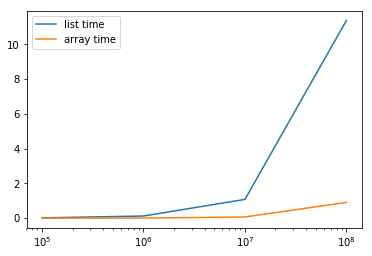

In [20]:
from matplotlib import pyplot as plt
plt.plot(lengths,times[:],label='list time')
plt.plot(lengths[0::],times_array,label='array time')
plt.xscale('log')

plt.legend()
plt.show()

1. Change the length of the array and keep track of how long the calculation takes as a function of that length.

1. Plot the time as a function of list length.

1. Now construct a Numpy array from the list `x` and perform the same calculation for several different array lengths.

1. (bonus) Plot the calculation time as a function of array length and add this line to the plot created in step #2.

## Activity #2

Lets load a couple files into a Pandas DataFrame and rearrange and merge them into a single file in a more useful format. `example_data/star_names.json` contains a list star names. The `primary_name` column is the primary ID for the star. For each unique `primary_name` there are many `other_names` associated with it. Each `primary_name`+`other_name` combination is stored in a separate row.

1. First load the file `example_data/star_names.json` into a Pandas DataFrame. The file is in JSON format so you might look into the `pandas.read_json` function.

1. Group the DataFrame on the `primary_name` column and create a custom aggregation function that takes all of the values in the `other_name` column that have the same `primary_name` and converts them into a single string deliminated with a pipe (`|`).

1. Load the `example_data/star_props.csv` file into a separate DataFrame and merge this with the grouped DataFrame from step #2.

1. Save the result as a new CSV file. The resulting file should look like `example_data/stars_merged.csv`. You may also load this file into Pandas to see what the final DataFrame should look like before saving to a CSV.

In [51]:
import pandas as pd
star_names=pd.read_json("../example_data/star_names.json")
star_names['other_name']=star_names['other_name']+"|"+star_names['primary_name']

In [52]:
star_names

,primary_name,other_name
0,KOI-1288,Kepler-807|KOI-1288
1,KOI-1288,KIC 10790387|KOI-1288
2,KOI-1288,KOI-1288|KOI-1288
3,KOI-1288,2MASS J19160484+4807113|KOI-1288
4,KOI-1288,Gaia DR2 2130955518633883008|KOI-1288
...,...,...
147445,NGC 7654 764,WDS J23243+6135E|NGC 7654 764
147446,NGC 7654 764,Gaia DR2 2015663443770063872|NGC 7654 764
147447,NGC 7654 806,NGC 7654 806|NGC 7654 806
147448,NGC 7654 806,GEN# +2.76540806|NGC 7654 806


In [53]:
star_props=pd.read_csv("../example_data/star_props.csv")
stars_merged=pd.merge(star_names,star_props,on='primary_name')

In [54]:
stars_merged.drop_duplicates('primary_name').sort_values('primary_name')

,primary_name,other_name,ra,dec,vmag
141,HAT-P-14,TYC 3086-152-1|HAT-P-14,17.341078,38.242164,11.571
148,HAT-P-18,GSC 02594-00646|HAT-P-18,17.089778,33.012500,NaN
56,HAT-P-21,TYC 3013-1229-1|HAT-P-21,11.418330,41.028020,11.558
154,HAT-P-23,TYC 1632-1396-1|HAT-P-23,20.408250,16.762222,NaN
162,HAT-P-27,GSC 00333-00351|HAT-P-27,14.851167,5.947500,NaN
171,HAT-P-31,TYC 2099-908-1|HAT-P-31,18.102500,26.426667,NaN
16,HAT-P-36,TYC 3020-2221-1|HAT-P-36,12.551080,44.915370,12.093
179,HAT-P-40,TYC 3607-1028-1|HAT-P-40,22.367528,45.457500,NaN
185,HAT-P-41,TYC 488-2442-1|HAT-P-41,19.821500,4.672500,NaN
191,HAT-P-44,GSC 03465-00123|HAT-P-44,14.209611,47.014722,NaN


In [55]:
stars_merged_fromcsv=pd.read_csv("../example_data/stars_merged.csv")

In [56]:
stars_merged_fromcsv

,Unnamed: 0,primary_name,other_name,ra,dec,vmag
0,0,HAT-P-14,TYC 3086-152-1|GSC 03086-00152|HAT-P-14|2MASS ...,17.341078,38.242164,11.571
1,1,HAT-P-18,GSC 02594-00646|HAT-P-18|2MASS J17052315+33004...,17.089778,33.012500,NaN
2,2,HAT-P-21,TYC 3013-1229-1|GSC 03013-01229|HAT-P-21|2MASS...,11.418330,41.028020,11.558
3,3,HAT-P-23,TYC 1632-1396-1|GSC 01632-01396|HAT-P-23|2MASS...,20.408250,16.762222,NaN
4,4,HAT-P-27,GSC 00333-00351|GSC2 N1310023215|HAT-P-27|2MAS...,14.851167,5.947500,NaN
5,5,HAT-P-31,TYC 2099-908-1|GSC 02099-00908|HAT-P-31|2MASS ...,18.102500,26.426667,NaN
6,6,HAT-P-36,TYC 3020-2221-1|CMC14 J123303.9+445455|GSC2.3 ...,12.551080,44.915370,12.093
7,7,HAT-P-40,TYC 3607-1028-1|GSC 03607-01028|HAT-P-40|2MASS...,22.367528,45.457500,NaN
8,8,HAT-P-41,TYC 488-2442-1|GSC 00488-02442|HAT-P-41|2MASS...,19.821500,4.672500,NaN
9,9,HAT-P-44,GSC 03465-00123|HAT-P-44|2MASS J14123457+47005...,14.209611,47.014722,NaN
